In [1]:
import cv2
import numpy as np
import skimage.io as si
import matplotlib.pyplot as plt

Reference: [link](https://docs.opencv.org/master/d2/de8/group__core__array.html#ga6fef31bc8c4071cbc114a758a2b79c14)
## 1. Addition & subtraction
The basic operation to use two images is `addition`. You can make the addition of two images with the `cv2.add()` function. The result obtained will be the combination of the two images. Important to add that the two images must match perfectly in size.

### 1.1. Addition.
$\qquad$ Remind that the pixel-values from your images are stored as the `8-bit integer` fluctuate in the range `[0, 255]`, hence, we firstly consider the `addition of 2 pixel` by using the `symbol`: `+` and the `function: cv2.add()`

In [2]:
x = np.uint8([8])
y = np.uint8([192])
z = np.uint8([121])

print(x+y, cv2.add(x, y))
print(y+z, cv2.add(y, z))

[200] [[200]]
[57] [[255]]


$\qquad \diamond$ **Comments.** For `x = np.uint([a])` and `y = np.uint([b])`

$\qquad \qquad \bullet$ We have

$$ x+y = \text{uint8}(a + b) = \left\lbrace \begin{array}{lcl} a + b & \text{ if } a + b \leq 255 \\ a + b - 256 & \text{ otherwise } \end{array} \right. $$
and
$$ \text{cv2.add}(x, y) = \min \lbrace 255, a+b \rbrace = \left\lbrace \begin{array}{lcl} a + b & \text{ if } a + b \leq 255 \\ 255 & \text{ otherwise } \end{array} \right. $$
$\qquad \qquad \bullet$ In case `a + b` are less than `255` then `x + y` and `cv2.add(x, y)` have the same value.

$\qquad \qquad \bullet$ Hence, by definition, the result of `x + y` and `y + x` are concide, similar for `cv2.add(x, y)` and `cv2.add(y, x)`

$\qquad$ Now, look at the following inllustration

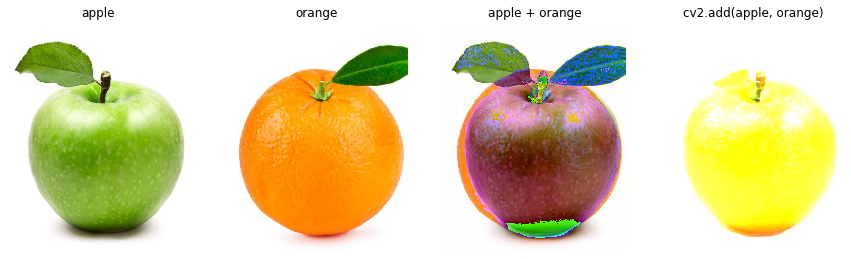

In [3]:
path = r"C:\Users\Admin\Desktop\apple_orange.jpg"
img = si.imread(path)
apple = img[:, :370, :]
orange = img[:, 360:730]

images = [apple, orange, apple + orange, cv2.add(apple, orange)]
titles = ['apple', 'orange', 'apple + orange', 'cv2.add(apple, orange)']

plt.figure(figsize = (15, 6))
for k in range(4):
    plt.subplot(1,4,k+1)
    plt.imshow(images[k])
    plt.title(titles[k])
    plt.axis("off")

### 1.2. Subtraction
You can do the same reasoning by subtracting two images. This operation can be performed with the `cv2.subtract()` function. This time we would expect an image that will tend more and more towards the black. Replace the `cv2.add()` function with this.

For `x = np.uint([a])` and `y = np.uint([b])`

$\qquad \qquad \bullet$ We have

$$ x-y = \text{uint8}(a - b) = \left\lbrace \begin{array}{lcl} a - b & \text{ if } a - b \geq 0 \\ a - b + 256 & \text{ otherwise } \end{array} \right. $$
and
$$ \text{cv2.subtract}(x, y) = \max \lbrace 0, a-b \rbrace = \left\lbrace \begin{array}{lcl} a - b & \text{ if } a - b \geq 0 \\ 0 & \text{ otherwise } \end{array} \right. $$
$\qquad \qquad \bullet$ In case `a > b` then `x - y` and `cv2.subtract(x, y)` have the same value.

In [4]:
print(x-y, cv2.subtract(x, y))
print(y-x, cv2.subtract(y, x))
print(y-z, cv2.subtract(y, z))
print(z-y, cv2.subtract(z, y))

[72] [[0]]
[184] [[184]]
[71] [[71]]
[185] [[0]]


$\qquad$ And then, let see the image-illustration.

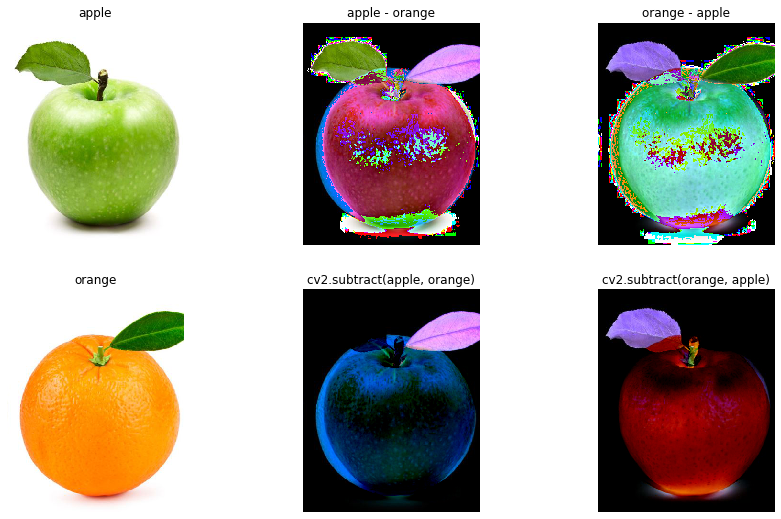

In [5]:
images = [apple, apple - orange, orange - apple, 
          orange, cv2.subtract(apple, orange), cv2.subtract(orange, apple)]
titles = ['apple', 'apple - orange', 'orange - apple', 
          'orange', 'cv2.subtract(apple, orange)', 'cv2.subtract(orange, apple)']
plt.figure(figsize = (15, 9))
for k in range(6):
    plt.subplot(2,3,k+1)
    plt.imshow(images[k])
    plt.title(titles[k])
    plt.axis("off")

## 2. Absolute difference
Since using the `cv2.subtract(x, y)` or `x - y` yields `0` at many pixel-values (`black region`), but how about its `absolute-difference`, or `cv2.absdiff()`, we have

$$ \text{cv2.absdiff}(x, y) = \text{abs}(a - b) = \text{cv2.absdiff}(y, x) $$

In [6]:
cv2.absdiff(x, y), abs(x - y)

(array([[184]], dtype=uint8), array([72], dtype=uint8))

Now, look at the result of `apple` and `orange` after using this function.

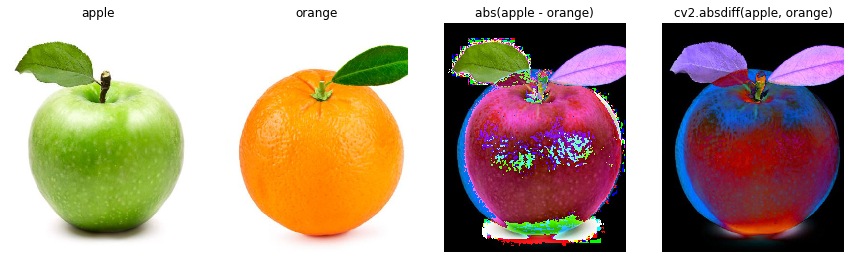

In [7]:
images = [apple, orange, abs(apple - orange), cv2.absdiff(apple, orange)]
titles = ['apple', 'orange', 'abs(apple - orange)', 'cv2.absdiff(apple, orange)']

plt.figure(figsize = (15, 6))
for k in range(4):
    plt.subplot(1,4,k+1)
    plt.imshow(images[k])
    plt.title(titles[k])
    plt.axis("off")

## 3. Multiplying & add_weigths_blending
### 3.1. Multiply
For `x = np.uint([a])` and `y = np.uint([b])`

$\qquad \qquad \bullet$ We have

$$ x*y = \text{uint8}(a * b) = \text{int}(a * b) \text{  mod  } 256 $$
and
$$ \text{cv2.multiply}(x, y) = \min \lbrace 255, \text{int}(a*b) \rbrace = \left\lbrace \begin{array}{lcl} \text{int}(a * b) & \text{ if } a * b \leq 255 \\ 255 & \text{ otherwise } \end{array} \right. $$
$\qquad \qquad \bullet$ In case `a * b <= 255` then `x * y` and `cv2.multiply(x, y)` have the same value.

$\qquad \qquad \bullet$ Look at the following example, for `x = np.uint([8])`, `y = np.uint([192])` and `z = np.uint([121])`, we have

                        x * y = (8 * 192) mod 256 = 1536 % 256 = 0
                        x * z = (8 * 121) mod 256 = 968 % 256 = 200
                        cv2.multiply(x, y) = min{255, (8*192)} = 255
                        np.uint8(y * 2.4) = int(192 * 2.4) % 256 = 460 % 256 = 204
                        

In [8]:
print(x, y, z)
print(x*y, cv2.multiply(x, y))
print(x*z, cv2.multiply(x, z))
print(np.uint8(y*0.4), np.uint8(y*2.4))

[8] [192] [121]
[0] [[255]]
[200] [[255]]
[76] [204]


**`Illustration`**.

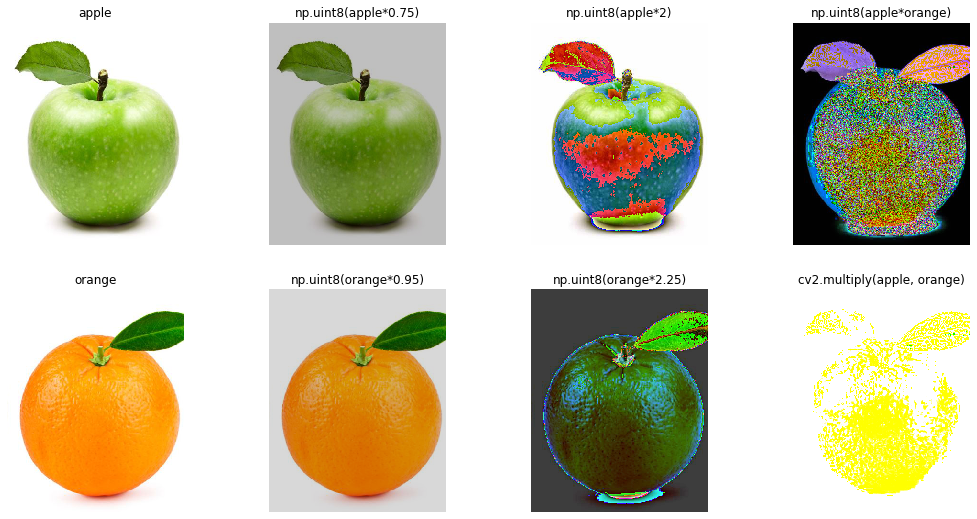

In [9]:
images = [apple, np.uint8(apple*0.75), np.uint8(apple*2), np.uint8(apple*orange),
          orange, np.uint8(orange*0.85), np.uint8(orange*2.25), cv2.multiply(apple, orange)]
titles = ['apple', 'np.uint8(apple*0.75)', 'np.uint8(apple*2)', 'np.uint8(apple*orange)', 
          'orange', 'np.uint8(orange*0.95)', 'np.uint8(orange*2.25)', 'cv2.multiply(apple, orange)']

plt.figure(figsize = (18, 9))
for k in range(8):
    plt.subplot(2,4,k+1)
    plt.imshow(images[k])
    plt.title(titles[k])
    plt.axis("off")

### 3.2. Blending with weights.
In the previous examples you saw that the `addition`, `subtraction` and also `absolute difference` of two images does not produce an intermediate `image between the two`, but the result of tending the `coloration toward whites or to blacks`.

The correct operation is called blending. That is, you can consider the operation of superimposing the two images one above the other, making the one placed above gradually more and more transparent. By adjusting the transparency gradually you get gradually a `mixture of the two images`, creating a new one that is the intermediate.

The blending operation does not correspond to the simple addition, but the formula corresponds to the following equation.

                        alpha*image_A + beta*image_B + gamma
In `OpenCV`, we can use `cv2.addWeighted()` with `syntax`:

                        cv2.addWeighted(image_A, alpha, image_B, beta, gamma)
                        
Now, look at these simple examples on the `pixel-values`.

In [10]:
alpha = 0.1
beta = 1 - alpha
gamma = np.uint8(10)
print(cv2.addWeighted(x, alpha, y, beta, gamma)) 
print(np.uint8(x*alpha + y*beta) + gamma)

[[184]]
[183]


**`Illustration`.**

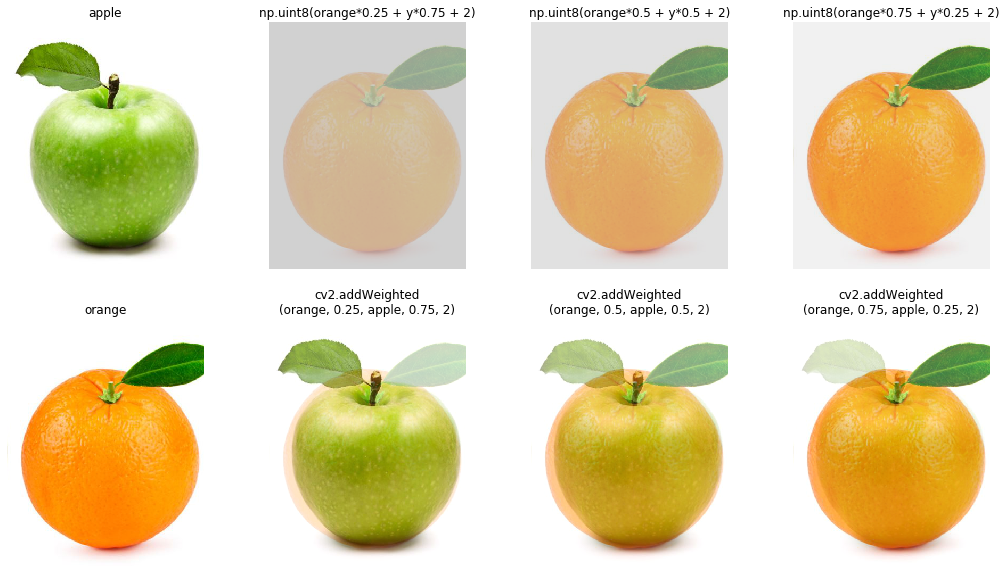

In [11]:
images = [apple, np.uint8(orange*0.25 + y*0.75 + 2), 
          np.uint8(orange*0.5 + y*0.5 + 2), np.uint8(orange*0.75 + y*0.25 + 2),
          orange, cv2.addWeighted(orange, 0.25, apple, 0.75, 2),
          cv2.addWeighted(orange, 0.5, apple, 0.5, 2), cv2.addWeighted(orange, 0.75, apple, 0.25, 2)
         ]

titles = ['apple', 'np.uint8(orange*0.25 + y*0.75 + 2)', 
          'np.uint8(orange*0.5 + y*0.5 + 2)', 'np.uint8(orange*0.75 + y*0.25 + 2)',
          'orange', 'cv2.addWeighted\n(orange, 0.25, apple, 0.75, 2)',
          'cv2.addWeighted\n(orange, 0.5, apple, 0.5, 2)', 'cv2.addWeighted\n(orange, 0.75, apple, 0.25, 2)'
         ]

plt.figure(figsize = (18, 10))
for k in range(8):
    plt.subplot(2,4,k+1)
    plt.imshow(images[k])
    plt.title(titles[k])
    plt.axis("off")